# Making affluent neighborhoods financially accessible to low-income earners.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point
import pyproj
import haversine as hs
import warnings
warnings.filterwarnings('ignore')

wgs84 = pyproj.Proj(init="epsg:4326")
# InputGrid = pyproj.Proj(projparams = 'NAD83')

### Load data

In [26]:
df = pd.read_csv('../data/kc_house_data.csv')

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [28]:
df['coord'] = list(zip(df.long,df.lat))
df['geometry'] = df.apply(lambda x: Point((x.long, x.lat)), axis = 1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [30]:
sps_df = pd.read_csv('../data/Public_Schools.csv')
sps_df.head()

,X,Y,OBJECTID,TYPE,SCHOOL,ADDRESS,SE_ANNO_CAD_DATA,NAME,GRADE,CITY,ZIP,PHONE,WEBSITE,XCOORD,YCOORD,SITE_USE,PRJ_ENRLLMNT
0,1.265681e+06,234243.291153,1,NonStandard,QUEEN ANNE GYM,1431 2nd Ave N,NaN,Queen Anne Gym,9-12,Seattle,98109,NaN,NaN,1.265681e+06,234243.291153,Active,NaN
1,1.274761e+06,217081.839912,2,Elementary,BEACON HILL ELEM,2025 14th Ave. S,NaN,Beacon Hill Int'l,K-5,Seattle,98144,(206) 252-2700,http://beaconhilles.seattleschools.org/,1.274761e+06,217081.839912,Active,NaN
2,1.262888e+06,203870.059905,3,Option Elementary,BOREN BLDG,5950 Delridge Way SW,NaN,Louisa Boren STEM,K-8,Seattle,98106,(206)252-8450,http://borenstemk8.seattleschools.org/,1.262888e+06,203870.059905,Active,NaN
3,1.271958e+06,194568.029953,4,Elementary,CONCORD ELEM,723 S Concord St.,NaN,Concord Int'l,K-5,Seattle,98108,(206) 252-8100,http://concordes.seattleschools.org/,1.271958e+06,194568.029953,Active,NaN
4,1.274823e+06,205005.729878,5,Option High School,CLEVELAND HIGH SCHOOL,5511 15th Ave S,NaN,Cleveland STEM,9-12,Seattle,98108,(206)252-7800,http://clevelandhs.seattleschools.org/,1.274823e+06,205005.729878,Active,NaN


In [31]:
sps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 107 non-null    float64
 1   Y                 107 non-null    float64
 2   OBJECTID          107 non-null    int64  
 3   TYPE              107 non-null    object 
 4   SCHOOL            107 non-null    object 
 5   ADDRESS           107 non-null    object 
 6   SE_ANNO_CAD_DATA  0 non-null      float64
 7   NAME              106 non-null    object 
 8   GRADE             106 non-null    object 
 9   CITY              107 non-null    object 
 10  ZIP               107 non-null    int64  
 11  PHONE             106 non-null    object 
 12  WEBSITE           106 non-null    object 
 13  XCOORD            107 non-null    float64
 14  YCOORD            107 non-null    float64
 15  SITE_USE          107 non-null    object 
 16  PRJ_ENRLLMNT      0 non-null      float64
dt

In [32]:
sps_df['geometry'] = sps_df.apply(lambda x: Point((x.XCOORD, x.YCOORD)), axis = 1)

In [33]:
sps_df.head()

,X,Y,OBJECTID,TYPE,SCHOOL,ADDRESS,SE_ANNO_CAD_DATA,NAME,GRADE,CITY,ZIP,PHONE,WEBSITE,XCOORD,YCOORD,SITE_USE,PRJ_ENRLLMNT,geometry
0,1.265681e+06,234243.291153,1,NonStandard,QUEEN ANNE GYM,1431 2nd Ave N,NaN,Queen Anne Gym,9-12,Seattle,98109,NaN,NaN,1.265681e+06,234243.291153,Active,NaN,POINT (1265680.67393531 234243.29115322)
1,1.274761e+06,217081.839912,2,Elementary,BEACON HILL ELEM,2025 14th Ave. S,NaN,Beacon Hill Int'l,K-5,Seattle,98144,(206) 252-2700,http://beaconhilles.seattleschools.org/,1.274761e+06,217081.839912,Active,NaN,POINT (1274760.89986931 217081.83991188)
2,1.262888e+06,203870.059905,3,Option Elementary,BOREN BLDG,5950 Delridge Way SW,NaN,Louisa Boren STEM,K-8,Seattle,98106,(206)252-8450,http://borenstemk8.seattleschools.org/,1.262888e+06,203870.059905,Active,NaN,POINT (1262888.33995307 203870.05990505)
3,1.271958e+06,194568.029953,4,Elementary,CONCORD ELEM,723 S Concord St.,NaN,Concord Int'l,K-5,Seattle,98108,(206) 252-8100,http://concordes.seattleschools.org/,1.271958e+06,194568.029953,Active,NaN,POINT (1271958.49996232 194568.02995272)
4,1.274823e+06,205005.729878,5,Option High School,CLEVELAND HIGH SCHOOL,5511 15th Ave S,NaN,Cleveland STEM,9-12,Seattle,98108,(206)252-7800,http://clevelandhs.seattleschools.org/,1.274823e+06,205005.729878,Active,NaN,POINT (1274823.0001388 205005.7298778)


In [34]:
gdf_sps = gpd.GeoDataFrame(sps_df)
gdf_sps.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   X                 107 non-null    float64 
 1   Y                 107 non-null    float64 
 2   OBJECTID          107 non-null    int64   
 3   TYPE              107 non-null    object  
 4   SCHOOL            107 non-null    object  
 5   ADDRESS           107 non-null    object  
 6   SE_ANNO_CAD_DATA  0 non-null      float64 
 7   NAME              106 non-null    object  
 8   GRADE             106 non-null    object  
 9   CITY              107 non-null    object  
 10  ZIP               107 non-null    int64   
 11  PHONE             106 non-null    object  
 12  WEBSITE           106 non-null    object  
 13  XCOORD            107 non-null    float64 
 14  YCOORD            107 non-null    float64 
 15  SITE_USE          107 non-null    object  
 16  PRJ_ENRLLMNT      

In [35]:
# pyproj.transform(InputGrid, wgs84, sps_df['XCOORD'],sps_df['YCOORD'])

In [36]:
sps_df['ZIP'].value_counts()

98118    12
98115    11
98103     8
98117     8
98108     7
98125     7
98144     6
98126     6
98122     6
98116     5
98112     4
98109     4
98106     4
98119     3
98199     3
98105     3
98133     2
98107     2
98102     2
98178     1
98146     1
98136     1
98177     1
Name: ZIP, dtype: int64

In [37]:
parks_df = pd.read_csv('../data/Seattle_Parks_And_Recreation_Park_Addresses.csv')
parks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PMAID       412 non-null    int64  
 1   LocID       412 non-null    int64  
 2   Name        412 non-null    object 
 3   Address     412 non-null    object 
 4   ZIP Code    412 non-null    int64  
 5   X Coord     412 non-null    float64
 6   Y Coord     412 non-null    float64
 7   Location 1  412 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 25.9+ KB


In [38]:
parks_df.head()

,PMAID,LocID,Name,Address,ZIP Code,X Coord,Y Coord,Location 1
0,281,2545,12th and Howe Play Park,1200 W Howe St,98119,-122.372985,47.636097,"(47.636097, -122.372985)"
1,4159,2387,12th Ave S Viewpoint,2821 12TH Ave S,98144,-122.317765,47.577953,"(47.577953, -122.317765)"
2,4467,2382,12th Ave Square Park,564 12th Ave,98122,-122.316455,47.607427,"(47.607427, -122.316455)"
3,4010,2546,14th Ave NW Boat Ramp,4400 14th Ave NW,98107,-122.373536,47.660775,"(47.660775, -122.373536)"
4,296,296,3001 E Madison,3001 E Madison St,98112,-122.293173,47.625169,"(47.625169, -122.293173)"


In [39]:
parks_df['ZIP Code'].value_counts()

98144    37
98122    28
98112    27
98118    23
98116    22
98115    21
98125    21
98109    20
98102    20
98199    19
98119    18
98103    18
98117    18
98105    16
98107    15
98106    15
98126    13
98108    13
98104    12
98136    10
98101     8
98121     7
98133     5
98178     3
98146     2
98177     1
Name: ZIP Code, dtype: int64

In [40]:
parks_df['coord'] = list(zip(parks_df['X Coord'],parks_df['Y Coord']))
parks_df['geometry'] = parks_df.apply(lambda x: Point((x['X Coord'],x['Y Coord'])), axis=1)

In [41]:
parks_df.head()

,PMAID,LocID,Name,Address,ZIP Code,X Coord,Y Coord,Location 1,coord,geometry
0,281,2545,12th and Howe Play Park,1200 W Howe St,98119,-122.372985,47.636097,"(47.636097, -122.372985)","(-122.372985, 47.636097)",POINT (-122.372985 47.636097)
1,4159,2387,12th Ave S Viewpoint,2821 12TH Ave S,98144,-122.317765,47.577953,"(47.577953, -122.317765)","(-122.317765, 47.577953)",POINT (-122.317765 47.577953)
2,4467,2382,12th Ave Square Park,564 12th Ave,98122,-122.316455,47.607427,"(47.607427, -122.316455)","(-122.316455, 47.607427)",POINT (-122.316455 47.607427)
3,4010,2546,14th Ave NW Boat Ramp,4400 14th Ave NW,98107,-122.373536,47.660775,"(47.660775, -122.373536)","(-122.373536, 47.660775)",POINT (-122.373536 47.660775)
4,296,296,3001 E Madison,3001 E Madison St,98112,-122.293173,47.625169,"(47.625169, -122.293173)","(-122.293173, 47.625169)",POINT (-122.293173 47.625169)


In [42]:
spp_df = pd.read_csv('../data/SPP_Sites.csv')
spp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Agency                       80 non-null     object 
 1   Site Name                    81 non-null     object 
 2   Physical Address: Latitude   80 non-null     float64
 3   Physical Address: Longitude  80 non-null     float64
 4   Classrooms 15-16             81 non-null     int64  
 5   Classrooms 16-17             81 non-null     int64  
 6   Classrooms 17-18             81 non-null     int64  
 7   Classrooms 18-19             81 non-null     int64  
 8   Classrooms 19-20             81 non-null     int64  
 9   19-20 Dual Language          80 non-null     object 
 10  19-20 Special Education      80 non-null     object 
dtypes: float64(2), int64(5), object(4)
memory usage: 7.1+ KB


In [43]:
gdf_parks = gpd.GeoDataFrame(parks_df)
gdf_parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PMAID       412 non-null    int64   
 1   LocID       412 non-null    int64   
 2   Name        412 non-null    object  
 3   Address     412 non-null    object  
 4   ZIP Code    412 non-null    int64   
 5   X Coord     412 non-null    float64 
 6   Y Coord     412 non-null    float64 
 7   Location 1  412 non-null    object  
 8   coord       412 non-null    object  
 9   geometry    412 non-null    geometry
dtypes: float64(2), geometry(1), int64(3), object(4)
memory usage: 32.3+ KB


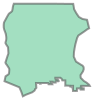

In [44]:
seattle_city_boundary = ox.geocoder.geocode_to_gdf({'city':'Seattle'})
seattle_city_boundary = seattle_city_boundary['geometry'][0]
seattle_city_boundary

In [45]:
df['in_seattle'] = ""

df['in_seattle'] = [True if coord.within(seattle_city_boundary) else False for coord in df['geometry']]
df_seattle = df[df['in_seattle'] == True]
df_seattle.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,coord,geometry,in_seattle
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,"(-122.257, 47.5112)",POINT (-122.257 47.5112),True
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,"(-122.319, 47.721)",POINT (-122.319 47.721),True
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,"(-122.393, 47.5208)",POINT (-122.393 47.5208),True
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,...,1942,0.0,98115,47.6900,-122.292,1330,6000,"(-122.292, 47.69)",POINT (-122.292 47.69),True
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,...,1900,0.0,98107,47.6700,-122.394,1360,4850,"(-122.394, 47.67)",POINT (-122.394 47.67),True


In [46]:
gdf_housing = gpd.GeoDataFrame(df_seattle)
gdf_housing.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6743 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             6743 non-null   int64   
 1   date           6743 non-null   object  
 2   price          6743 non-null   float64 
 3   bedrooms       6743 non-null   int64   
 4   bathrooms      6743 non-null   float64 
 5   sqft_living    6743 non-null   int64   
 6   sqft_lot       6743 non-null   int64   
 7   floors         6743 non-null   float64 
 8   waterfront     6017 non-null   object  
 9   view           6723 non-null   object  
 10  condition      6743 non-null   object  
 11  grade          6743 non-null   object  
 12  sqft_above     6743 non-null   int64   
 13  sqft_basement  6743 non-null   object  
 14  yr_built       6743 non-null   int64   
 15  yr_renovated   5503 non-null   float64 
 16  zipcode        6743 non-null   int64   
 17  lat            6743 non-

In [47]:
gdf_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,coord,geometry,in_seattle
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,"(-122.257, 47.5112)",POINT (-122.25700 47.51120),True
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,"(-122.319, 47.721)",POINT (-122.31900 47.72100),True
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,"(-122.393, 47.5208)",POINT (-122.39300 47.52080),True
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,...,1942,0.0,98115,47.6900,-122.292,1330,6000,"(-122.292, 47.69)",POINT (-122.29200 47.69000),True
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,...,1900,0.0,98107,47.6700,-122.394,1360,4850,"(-122.394, 47.67)",POINT (-122.39400 47.67000),True


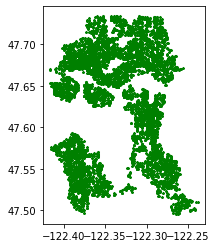

In [48]:
gdf_housing.plot(marker='*', color='green', markersize=5);

In [49]:
gdf_housing.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,in_seattle
id,1.000000,-0.037764,-0.002391,-0.033806,-0.028901,-0.012153,-0.031339,-0.031844,-0.037151,0.002302,-0.081167,-0.014541,0.092266,-0.045553,-0.015694,NaN
price,-0.037764,1.000000,0.351768,0.503948,0.764274,0.312328,0.214481,0.731372,-0.068161,0.158697,0.039557,0.155736,0.009987,0.682678,0.256779,NaN
bedrooms,-0.002391,0.351768,1.000000,0.480279,0.591110,0.173467,0.123862,0.511819,-0.027823,0.077799,0.002695,0.020521,0.095586,0.315556,0.131805,NaN
bathrooms,-0.033806,0.503948,0.480279,1.000000,0.678673,0.023491,0.482740,0.614839,0.394579,0.134290,0.019023,0.038101,0.015656,0.389083,-0.005687,NaN
sqft_living,-0.028901,0.764274,0.591110,0.678673,1.000000,0.350144,0.221974,0.857322,0.033981,0.157552,0.090742,0.047982,0.064037,0.645018,0.303609,NaN
sqft_lot,-0.012153,0.312328,0.173467,0.023491,0.350144,1.000000,-0.305652,0.308801,-0.227351,0.072807,0.166608,-0.006850,0.069778,0.341093,0.806802,NaN
floors,-0.031339,0.214481,0.123862,0.482740,0.221974,-0.305652,1.000000,0.429269,0.528094,0.029612,-0.099091,0.096123,-0.034064,0.078218,-0.341104,NaN
sqft_above,-0.031844,0.731372,0.511819,0.614839,0.857322,0.308801,0.429269,1.000000,0.100017,0.146186,0.049385,0.077197,0.062788,0.570672,0.250605,NaN
yr_built,-0.037151,-0.068161,-0.027823,0.394579,0.033981,-0.227351,0.528094,0.100017,1.000000,-0.182603,0.041422,0.002665,-0.044153,-0.081473,-0.210374,NaN
yr_renovated,0.002302,0.158697,0.077799,0.134290,0.157552,0.072807,0.029612,0.146186,-0.182603,1.000000,0.023019,-0.005931,-0.005757,0.086729,0.074291,NaN


In [50]:
def distance_from(loc1,loc2): 
    dist=hs.haversine(loc1,loc2)
    return round(dist,2)

In [51]:
distance_from(gdf_housing['coord'][0],gdf_parks['coord'][0])

14.88

In [52]:
gdf_housing['coord'][0]

(-122.257, 47.5112)

In [53]:
gdf_parks['Location 1'][0]

'(47.636097, -122.372985)'

In [54]:
gdf_housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,coord,geometry,in_seattle
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,"(-122.257, 47.5112)",POINT (-122.25700 47.51120),True
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,"(-122.319, 47.721)",POINT (-122.31900 47.72100),True
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,"(-122.393, 47.5208)",POINT (-122.39300 47.52080),True
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,...,1942,0.0,98115,47.6900,-122.292,1330,6000,"(-122.292, 47.69)",POINT (-122.29200 47.69000),True
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,...,1900,0.0,98107,47.6700,-122.394,1360,4850,"(-122.394, 47.67)",POINT (-122.39400 47.67000),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,7936000429,3/26/2015,1010000.0,4,3.50,3510,7200,2.0,NO,NONE,...,2009,0.0,98136,47.5537,-122.398,2050,6200,"(-122.398, 47.5537)",POINT (-122.39800 47.55370),True
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,2008,0.0,98116,47.5773,-122.409,1330,1265,"(-122.409, 47.5773)",POINT (-122.40900 47.57730),True
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,2009,0.0,98103,47.6993,-122.346,1530,1509,"(-122.346, 47.6993)",POINT (-122.34600 47.69930),True
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2009,0.0,98144,47.5944,-122.299,1020,2007,"(-122.299, 47.5944)",POINT (-122.29900 47.59440),True


In [55]:
gdf_housing['count_parks'] = 0

idx = 0
for housing_coord in gdf_housing.coord:
    count = 0
    for park_coord in gdf_parks.coord:
        if distance_from(housing_coord, park_coord) <= 5:
            count +=1
    gdf_housing['count_parks'][idx] = count
    idx +=1
             

In [56]:
gdf_housing.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,in_seattle,count_parks
id,1.000000,-0.037764,-0.002391,-0.033806,-0.028901,-0.012153,-0.031339,-0.031844,-0.037151,0.002302,-0.081167,-0.014541,0.092266,-0.045553,-0.015694,NaN,0.041020
price,-0.037764,1.000000,0.351768,0.503948,0.764274,0.312328,0.214481,0.731372,-0.068161,0.158697,0.039557,0.155736,0.009987,0.682678,0.256779,NaN,0.002055
bedrooms,-0.002391,0.351768,1.000000,0.480279,0.591110,0.173467,0.123862,0.511819,-0.027823,0.077799,0.002695,0.020521,0.095586,0.315556,0.131805,NaN,0.023046
bathrooms,-0.033806,0.503948,0.480279,1.000000,0.678673,0.023491,0.482740,0.614839,0.394579,0.134290,0.019023,0.038101,0.015656,0.389083,-0.005687,NaN,-0.033036
sqft_living,-0.028901,0.764274,0.591110,0.678673,1.000000,0.350144,0.221974,0.857322,0.033981,0.157552,0.090742,0.047982,0.064037,0.645018,0.303609,NaN,0.014843
sqft_lot,-0.012153,0.312328,0.173467,0.023491,0.350144,1.000000,-0.305652,0.308801,-0.227351,0.072807,0.166608,-0.006850,0.069778,0.341093,0.806802,NaN,0.046605
floors,-0.031339,0.214481,0.123862,0.482740,0.221974,-0.305652,1.000000,0.429269,0.528094,0.029612,-0.099091,0.096123,-0.034064,0.078218,-0.341104,NaN,-0.076200
sqft_above,-0.031844,0.731372,0.511819,0.614839,0.857322,0.308801,0.429269,1.000000,0.100017,0.146186,0.049385,0.077197,0.062788,0.570672,0.250605,NaN,-0.001929
yr_built,-0.037151,-0.068161,-0.027823,0.394579,0.033981,-0.227351,0.528094,0.100017,1.000000,-0.182603,0.041422,0.002665,-0.044153,-0.081473,-0.210374,NaN,-0.120710
yr_renovated,0.002302,0.158697,0.077799,0.134290,0.157552,0.072807,0.029612,0.146186,-0.182603,1.000000,0.023019,-0.005931,-0.005757,0.086729,0.074291,NaN,0.027004


In [57]:
gdf_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,coord,geometry,in_seattle,count_parks
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,98178,47.5112,-122.257,1340,5650,"(-122.257, 47.5112)",POINT (-122.25700 47.51120),True,32
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1991.0,98125,47.7210,-122.319,1690,7639,"(-122.319, 47.721)",POINT (-122.31900 47.72100),True,81
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0.0,98136,47.5208,-122.393,1360,5000,"(-122.393, 47.5208)",POINT (-122.39300 47.52080),True,111
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,...,0.0,98115,47.6900,-122.292,1330,6000,"(-122.292, 47.69)",POINT (-122.29200 47.69000),True,60
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,...,0.0,98107,47.6700,-122.394,1360,4850,"(-122.394, 47.67)",POINT (-122.39400 47.67000),True,156


In [ ]:
plt.hist(gdf_housing['count_parks'])